# Анализ авторства текстов
Этот блокнот анализирует два текстовых файла (`author_1.txt` и `author_2.txt`) для определения авторства с использованием частотности слов, длины предложений и нечёткого поиска.

## Установка зависимостей
Убедитесь, что у вас установлены необходимые библиотеки. Выполните эту команду в терминале или ячейке с `!`:

In [ ]:
# !pip install nltk fuzzywuzzy python-Levenshtein matplotlib

## Импорт библиотек и настройка
Импортируем библиотеки и загружаем данные для NLTK.

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

# Загрузка данных NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Установка отображения графиков в ноутбуке
%matplotlib inline

c:\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Функции для анализа
Определяем функции для чтения файлов, очистки текста и анализа.

In [3]:
# Чтение текстового файла
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Очистка текста
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем знаки препинания
    return text

# Частотность слов
def word_frequency(text):
    words = word_tokenize(clean_text(text))
    stop_words = set(stopwords.words('english'))  # Замените на 'russian' для русского текста
    words = [word for word in words if word not in stop_words]
    return Counter(words)

# Анализ длины предложений
def sentence_length_analysis(text):
    sentences = sent_tokenize(text)
    lengths = [len(word_tokenize(sent)) for sent in sentences]
    return sum(lengths) / len(lengths) if lengths else 0, lengths

# Нечёткое сравнение
def fuzzy_comparison(text1, text2, sample_size=1000):
    text1_chunk = clean_text(text1)[:sample_size]
    text2_chunk = clean_text(text2)[:sample_size]
    return fuzz.ratio(text1_chunk, text2_chunk)

## Основной анализ
Загружаем файлы и проводим анализ.

In [4]:
# Укажите пути к файлам
file1 = "f:\chatepc\chatalx\work\data\sevastopol.txt"
file2 = "f:\chatepc\chatalx\work\data\oblomov.txt"

# Чтение текстов
text1 = read_file(file1)
text2 = read_file(file2)

# Частотность слов
freq1 = word_frequency(text1)
freq2 = word_frequency(text2)

# Вывод топ-10 слов
print(f"Топ-10 слов в {file1}: {freq1.most_common(10)}")
print(f"Топ-10 слов в {file2}: {freq2.most_common(10)}")

# Пересечение общих слов
common_words = set(freq1.keys()) & set(freq2.keys())
print(f"Количество общих слов: {len(common_words)}")

# Анализ длины предложений
avg_len1, lengths1 = sentence_length_analysis(text1)
avg_len2, lengths2 = sentence_length_analysis(text2)
print(f"Средняя длина предложений в {file1}: {avg_len1:.2f} слов")
print(f"Средняя длина предложений в {file2}: {avg_len2:.2f} слов")

# Нечёткое сравнение
fuzzy_score = fuzzy_comparison(text1, text2)
print(f"Нечёткое сходство между текстами: {fuzzy_score}%")

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\alexewd\AppData\Local\Temp\ipykernel_984\4187228490.py:2: SyntaxWarning: invalid escape sequence '\c'
  file1 = "f:\chatepc\chatalx\work\data\sevastopol.txt"
C:\Users\alexewd\AppData\Local\Temp\ipykernel_984\4187228490.py:3: SyntaxWarning: invalid escape sequence '\c'
  file2 = "f:\chatepc\chatalx\work\data\oblomov.txt"


Топ-10 слов в f:\chatepc\chatalx\work\data\sevastopol.txt: [('и', 1687), ('в', 859), ('на', 721), ('не', 622), ('он', 562), ('с', 537), ('что', 508), ('как', 346), ('а', 238), ('я', 232)]
Топ-10 слов в f:\chatepc\chatalx\work\data\oblomov.txt: [('и', 6016), ('не', 3896), ('в', 3525), ('он', 2626), ('что', 2406), ('на', 2401), ('с', 2038), ('она', 1633), ('а', 1574), ('как', 1535)]
Количество общих слов: 4548
Средняя длина предложений в f:\chatepc\chatalx\work\data\sevastopol.txt: 20.48 слов
Средняя длина предложений в f:\chatepc\chatalx\work\data\oblomov.txt: 15.38 слов
Нечёткое сходство между текстами: 1%


## Визуализация
Строим гистограмму распределения длины предложений.

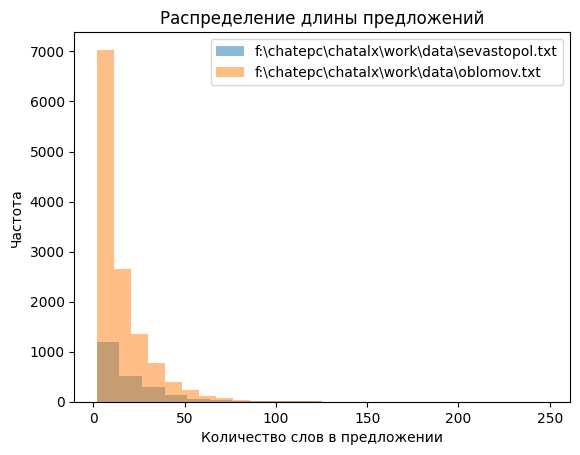

In [5]:
plt.hist(lengths1, bins=20, alpha=0.5, label=file1)
plt.hist(lengths2, bins=20, alpha=0.5, label=file2)
plt.legend(loc='upper right')
plt.title('Распределение длины предложений')
plt.xlabel('Количество слов в предложении')
plt.ylabel('Частота')
plt.show()